# LVIT Test

# Instructions

## Before Using this Program
#### First trial after connecting LVIT: "Test_VMeasurement"
Upload the Arduino file "Test_VMeasurement.ino" on the Arduino software. Wait to see if data is recorded, then Close out the program.
    Subsequent trials can ignore this step.

#### First trial of each day: "LVIT Calibration Test"
Use python file "LVIT Calibration Test". Replace the port name with the port the LVIT is attached to. Replace the heights with the values of the calibration blocks. Run the program and place the corresponding block when prompted. Shut down the Kernel.  

## Main Recording Program: "LVIT Test"
Use python file "LVIT Test". Replace the port name with the port the LVIT is attached to. Input y-intercept and slope from Calibration Test. Replace minutes with how many minutes will be used. 

In [1]:
import serial
import time
from datetime import datetime
import pdb
import csv
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [2]:
def closest_value(input_list, input_value):
 
  arr = np.asarray(input_list)
 
  i = (np.abs(arr - input_value)).argmin()
 
  return arr[i]

## Calibration

In [3]:
#Set Port for LVIT
serialPortName = 'COM6'
serialPort = serial.Serial(
    port=serialPortName, baudrate=9600, bytesize=8, timeout=2, stopbits=serial.STOPBITS_ONE
)

In [4]:
#Copy and Pase Calibration Data from end of Calibration Script

Slope = 0.054
Intercept = 3.905

In [5]:
#Set List of Brands
brand_list = ['A', 'L','W']

# Ask for the brand
brand = input("Which brand is it from the list (A, L)? ").upper()
if brand in map(str.upper, brand_list):
    print('In List')
    
    #Ask for which expirement run?
    #experiment = input("What number setup is this? (#)")
    date_tested = datetime.now()
    experiment = date_tested.strftime("%m-%d-%y")

    # Ask for the run number
    run_number = input("What is the run number? ")
    
    #Create a reference for later calculation
    initial_mass = input("Input Initial Mass of the Full Test Cell+SAP:")

    #Create Filenames
    filename = f"{brand}_{run_number}_{experiment}.csv"
    full_filename = f"{brand}_{run_number}_{experiment}_original.csv"
    
    print(filename)
    print(full_filename)

    
else:
    print("Not in list")

Which brand is it from the list (A, L)? W
In List
What is the run number? 2
Input Initial Mass of the Full Test Cell+SAP:55.88
W_2_02-29-24.csv
W_2_02-29-24_original.csv


## Main Testing Loop

In [6]:
serialString = ""  # Used to hold data coming over UART

# Get timestamps for the file name and Loop
time_start = time.time()
now = datetime.now()
current_time = now.strftime("%m-%d-%y_%H-%M-%S")

time_last_log = time.time()
time_now = time.time()
time_elapsed = time_now - time_start

# Open output data file
output_filename = f"{brand}{experiment}_{run_number}_Scale_Output_Data_{current_time}.csv"
#output_filename = 'Test1'
f = open(output_filename, "w")
#LVIT Run Time
minutes = 30
duration = 60 * minutes



# Main Loop
while time_elapsed < duration + 1:
  
  time_now = time.time()
  time_elapsed = time_now - time_start

  # Wait until there is data waiting in the serial buffer
  if serialPort.in_waiting > 0:

    # Read data out of the buffer until a carraige return / new line is found
    serialString = serialPort.readline(16)
    serial_output = serialString.decode("Ascii")

    # it's time to log another weight value.
    time_since_last_log = time_now - time_last_log

    if time_since_last_log >= .995:
      # Reformat output from '  -23.8g\n' to '-23.8'
      weight = serial_output
      
      weight = weight.replace("g\n", "")
      
      
      # Print the contents of the serial data to the file
      try:
        output = "{0},{1}\n".format(round(time_elapsed, 3), weight)
        print(output)
        weight = weight.replace("Voltage: ","")
        output = output.replace("Voltage: ","")
        output = output.replace("V","")
        f.write(output)
      except:
        pass
      time_last_log = time_now
    
   

f.close()

final_mass = input("Input Final Mass of the Full Test Cell+SAP:")

1.007,2.06256


2.008,2.03324


3.023,2.04301


4.04,2.02346


5.056,2.01369


6.073,2.05279


7.074,3.71457


8.091,3.86119


9.107,3.86119


10.122,3.86119


11.138,3.87097


12.14,3.86119


13.156,3.86119


14.174,3.86119


15.19,3.87097


16.205,3.86119


17.206,3.86119


18.223,3.86119


19.239,3.86119


20.255,3.86119


21.26,3.85142


22.274,3.86119


23.289,3.86119


24.307,3.85142


25.323,3.85142


26.339,3.86119


27.34,3.85142


28.356,3.85142


29.374,3.84164


30.388,3.84164


31.406,3.84164


32.406,3.84164


33.423,3.84164


34.439,3.83187


35.456,3.82209


36.472,3.82209


37.474,3.83187


38.491,3.82209


39.507,3.82209


40.512,3.82209


41.525,3.82209


42.544,3.82209


43.561,3.82209


44.574,3.81232


45.574,3.81232


46.591,3.80254


47.609,3.81232


48.624,3.80254


49.639,3.80254


50.656,3.81232


51.657,3.81232


52.674,3.80254


53.689,3.80254


54.706,3.80254


55.708,3.79277


56.725,3.79277


57.74,3.78299


58.757,3.78299


59.773,3.78299


60.789,3.782

471.145,3.29423


472.162,3.30401


473.163,3.29423


474.178,3.30401


475.195,3.29423


476.212,3.30401


477.228,3.30401


478.229,3.29423


479.245,3.29423


480.261,3.29423


481.278,3.29423


482.294,3.29423


483.311,3.29423


484.311,3.28446


485.328,3.28446


486.345,3.28446


487.36,3.28446


488.362,3.29423


489.38,3.28446


490.394,3.28446


491.411,3.28446


492.427,3.29423


493.428,3.27468


494.446,3.28446


495.462,3.28446


496.479,3.28446


497.479,3.28446


498.496,3.28446


499.513,3.28446


500.529,3.28446


501.546,3.27468


502.546,3.27468


503.562,3.27468


504.58,3.28446


505.596,3.27468


506.611,3.27468


507.613,3.27468


508.628,3.27468


509.645,3.27468


510.662,3.28446


511.678,3.27468


512.68,3.27468


513.696,3.27468


514.713,3.27468


515.729,3.27468


516.747,3.27468


517.761,3.27468


518.761,3.26491


519.779,3.26491


520.8,3.27468


521.812,3.27468


522.815,3.27468


523.829,3.26491


524.846,3.26491


525.863,3.26491


526.878,3.27468


936.221,3.06940


937.234,3.06940


938.249,3.06940


939.25,3.06940


940.267,3.06940


941.283,3.06940


942.298,3.06940


943.316,3.05963


944.317,3.06940


945.332,3.06940


946.356,3.05963


947.366,3.05963


948.366,3.06940


949.387,3.05963


950.404,3.06940


951.415,3.05963


952.433,3.05963


953.434,3.05963


954.46,3.05963


955.466,3.05963


956.483,3.05963


957.499,3.06940


958.5,3.05963


959.517,3.05963


960.533,3.05963


961.549,3.05963


962.55,3.06940


963.567,3.05963


964.585,3.05963


965.599,3.05963


966.618,3.04985


967.617,3.05963


968.633,3.05963


969.651,3.05963


970.666,3.05963


971.683,3.04985


972.685,3.05963


973.701,3.04985


974.717,3.04985


975.732,3.05963


976.749,3.04985


977.75,3.05963


978.767,3.05963


979.783,3.05963


980.799,3.05963


981.801,3.05963


982.818,3.04985


983.834,3.05963


984.85,3.04985


985.866,3.05963


986.867,3.04985


987.883,3.05963


988.901,3.04985


989.917,3.04985


990.933,3.04985


991.934,3.04985



1379.921,2.99120


1380.937,2.99120


1381.953,2.99120


1382.966,2.99120


1383.972,2.99120


1384.987,2.99120


1386.005,2.99120


1387.021,3.00098


1388.024,2.99120


1389.039,2.98143


1390.054,2.99120


1391.07,3.00098


1392.072,2.98143


1393.088,3.00098


1394.105,2.99120


1395.12,2.99120


1396.138,2.99120


1397.137,2.99120


1398.155,2.99120


1399.173,2.99120


1400.187,2.99120


1401.203,2.99120


1402.204,2.99120


1403.223,2.99120


1404.239,2.99120


1405.253,2.99120


1406.27,2.99120


1407.271,2.99120


1408.287,2.99120


1409.304,2.99120


1410.322,2.99120


1411.322,2.99120


1412.338,2.99120


1413.359,2.99120


1414.376,2.99120


1415.388,2.99120


1416.388,2.99120


1417.404,2.98143


1418.422,2.99120


1419.439,2.99120


1420.455,2.99120


1421.466,2.99120


1422.472,2.99120


1423.489,2.99120


1424.505,2.99120


1425.521,2.99120


1426.522,2.98143


1427.538,2.99120


1428.555,2.98143


1429.571,2.99120


1430.573,2.98143


1431.59,2.99120


1432.605,2.99120

## Data Reading

In [7]:
#Initialize Variables
Time = []
position = []
position_og = []
voltage = []

print(output_filename)

#Use file from Main Loop to set time, voltage, and position lists.
with open(output_filename, 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    next(csv_reader)  # skip header row
    for row in csv_reader:
        if row == []:
            continue
        if row[0] == '' or row[1] == '' or row == '':
            continue
        Time.append(float(row[0]))
        voltage.append(float(row[1]))
    

    

W02-29-24_2_Scale_Output_Data_02-29-24_13-45-59.csv


## Data Manipulation

### Positional Data

In [8]:
#Use slope and y-intercept from Calibration Data to transform Voltage to Position.
position = [(i - Intercept)  / Slope for i in voltage] #Converts from Voltage to mm
position = [-i + max(position) for i in position] #Flip data to reflect movement of polymer and set zero point.

#Set Lists for the unmanipulated variables.    
position_og = position
time_og = Time

#Subtract initial manual movement.
position = position[position.index(min(position)):]
Time = Time[:len(position)]

displacement = max(position) - min(position)
print('Total Displacement:',displacement, 'mm\n')


Total Displacement: 17.016111111111105 mm



#### Velocity Appx.

In [9]:
#Calculate the change in position and time.
dP = [i - position[0] for i in position[1:]]
dTp = [i - Time[0] for i in Time[1:]]

# Calculate velocity (change in position over change in time)
velocity = [dP[i]/dTp[i]  for i in range(len(dP))]
velocity = [0] + velocity

max_velocity = max(velocity)
print('Max Velocity: ',max_velocity,' mm/s')

Max Velocity:  0.17843459222768976  mm/s


### Mass Data

In [10]:
#Develop Area to use in approximating volume.
radius = 30 #in cm
area = np.pi*radius**2

#Use area and positional data to create mass data.
mass_og = [area*i*0.001 for i in position_og]
mass_calc = [area*i*0.001 for i in position]
Tm = Time

#Use the measured mass data to fit the calculated mass data from the LVIT.
ratio = (float(final_mass)-float(initial_mass))/(max(mass_calc)-min(mass_calc))
mass = [ratio*i for i in mass_calc]
absorption = max(mass) - min(mass)
print('Total Absorption:',absorption, 'cc')

Total Absorption: 48.33 cc


#### Rate Appx.

In [11]:
#Calculate the change in mass and time.
dM = [i - mass[0] for i in mass[1:]]
dTm = [i - Tm[0] for i in Tm[1:]]

# Calculate mass_rate (change in mass over change in time)
mass_rate = [dM[i]/dTm[i]  for i in range(len(dM))]
mass_rate = [0] + mass_rate
TV = Time[:len(mass_rate)]

max_rate = max(mass_rate)
print('Max Mass Change Rate: ',max_rate,' cc/s')

Max Mass Change Rate:  0.5067987500818063  cc/s


#### T-20 appx.

In [12]:
M20 = closest_value(mass,20)
T20 = Time[mass.index(M20)]
print("T-20 = ",T20," , occurs when Mass = ",M20)

T-20 =  241.142  , occurs when Mass =  20.051635051748345


### Noise appx.

In [13]:
P3 = position[1500:]
std_P = np.std(P3)
print(round(std_P,4))

0.1313


# Plots (Position, Velocity, Mass, Mass Rate)

Text(0.5, 1.0, 'CC Rate vs Time')

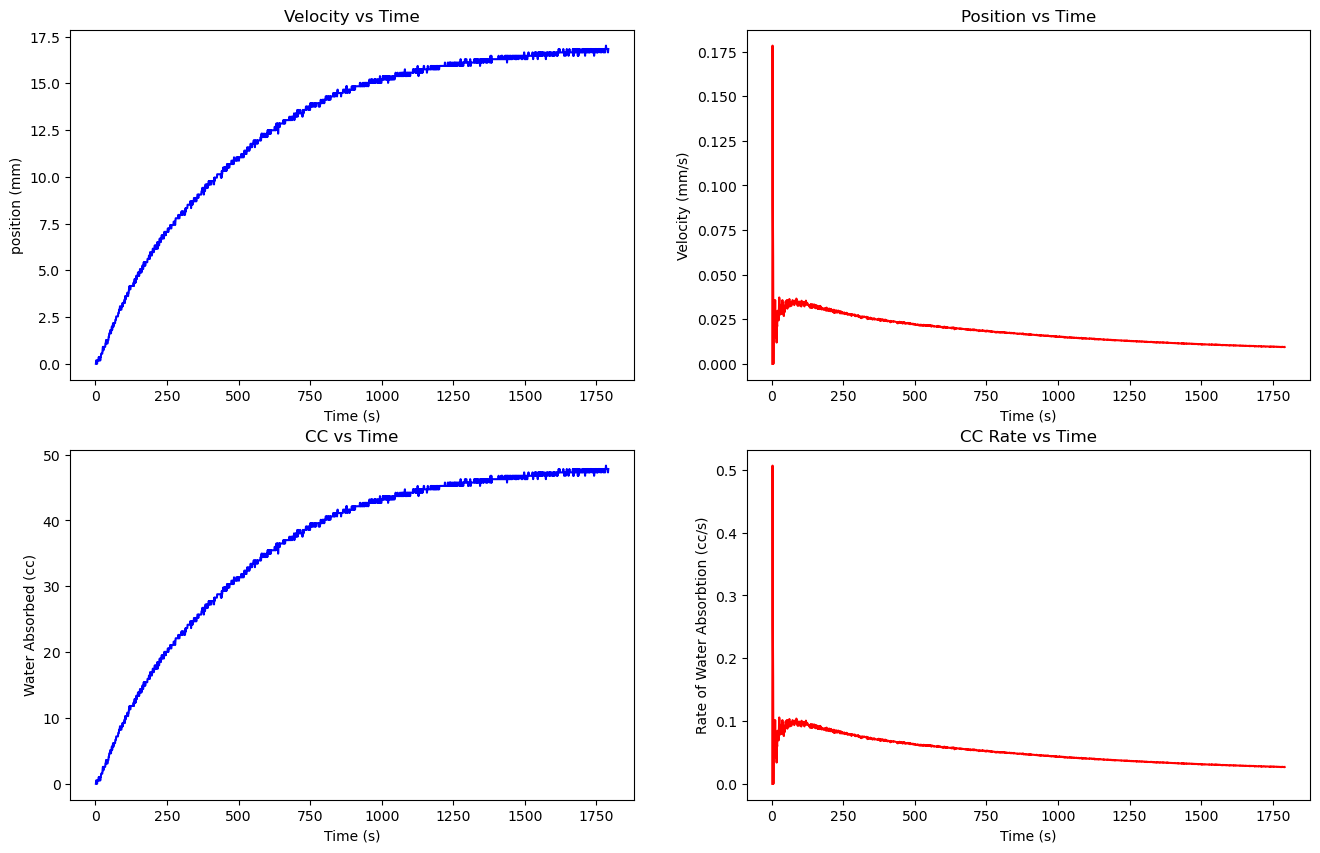

In [14]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
axs = axs.flatten()

axs[0].plot(Time, position,'b')
axs[1].plot(TV, velocity,'r')
axs[2].plot(Time, mass,'b')
axs[3].plot(TV, mass_rate,'r')

axs[0].set_xlabel('Time (s)')
axs[1].set_xlabel('Time (s)')
axs[2].set_xlabel('Time (s)')
axs[3].set_xlabel('Time (s)')

axs[0].set_ylabel('position (mm)')
axs[1].set_ylabel('Velocity (mm/s)')
axs[2].set_ylabel('Water Absorbed (cc)')
axs[3].set_ylabel('Rate of Water Absorbtion (cc/s)')

axs[1].set_title('Position vs Time')
axs[0].set_title('Velocity vs Time')
axs[2].set_title('CC vs Time')
axs[3].set_title('CC Rate vs Time')


# Save Data

#### File 1: Time, Position, Mass

#### File 2: Full Time, Voltage, Full Position, Full Mass


In [15]:
# Writing data to CSV files

with open(filename, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    for i in range(len(Time)):
        writer.writerow([Time[i], position[i], mass[i], mass_calc[i]])

with open(full_filename, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    for i in range(len(Time)):
        writer.writerow([time_og[i], voltage[i], position_og[i], mass_og[i]])

print(filename,'written')
print(full_filename,'written')


W_2_02-29-24.csv written
W_2_02-29-24_original.csv written
